In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

In [2]:
ds = pd.read_csv('heart_data.csv')

In [3]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
ds.shape

(303, 14)

In [6]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X = ds.drop("target",axis=1)
y = ds['target']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [9]:
xtrain.shape

(242, 13)

In [10]:
xtest.shape

(61, 13)

In [11]:
X.shape[1]

13

In [12]:
INPUT_SIZE = X.shape[1]

dnn = models.Sequential([
    layers.Dense(8,activation='relu',input_dim=13),
    layers.Dense(1,activation = 'sigmoid' )]
)

In [13]:
labels = np.unique(ytrain)

In [14]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(ytrain),
                                        y = ytrain
                                    )
classWeight = dict(enumerate(class_weights))

In [15]:
dnn.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = 'mean_squared_error',
              metrics=['accuracy'])

In [16]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [28]:
history_dnn = dnn.fit(xtrain, ytrain, epochs=100, class_weight=classWeight,validation_data=(xtest,ytest))

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1172 - accuracy: 0.8471 - val_loss: 0.1400 - val_accuracy: 0.8033
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1207 - accuracy: 0.8471 - val_loss: 0.1287 - val_accuracy: 0.8197
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1149 - accuracy: 0.8636 - val_loss: 0.1280 - val_accuracy: 0.8033
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1177 - accuracy: 0.8430 - val_loss: 0.1297 - val_accuracy: 0.8033
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1196 - accuracy: 0.8512 - val_loss: 0.1318 - val_accuracy: 0.8033
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1189 - accuracy: 0.8388 - val_loss: 0.1291 - val_accuracy: 0.8033
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1185 - accuracy: 0.8471 - val_loss: 0.1347 - val_accuracy: 0.8197
Epoch 8/100
8/8 [=======

8/8 [==============================] - 0s 14ms/step - loss: 0.1167 - accuracy: 0.8471 - val_loss: 0.1394 - val_accuracy: 0.8033
Epoch 60/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1182 - accuracy: 0.8264 - val_loss: 0.1315 - val_accuracy: 0.8033
Epoch 61/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1130 - accuracy: 0.8554 - val_loss: 0.1459 - val_accuracy: 0.8033
Epoch 62/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1207 - accuracy: 0.8430 - val_loss: 0.1343 - val_accuracy: 0.7869
Epoch 63/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1159 - accuracy: 0.8388 - val_loss: 0.1286 - val_accuracy: 0.8197
Epoch 64/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1167 - accuracy: 0.8636 - val_loss: 0.1291 - val_accuracy: 0.8033
Epoch 65/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1170 - accuracy: 0.8306 - val_loss: 0.1338 - val_accuracy: 0.7869
Epoch 66/100
8/8 [========

In [29]:
score = dnn.evaluate(xtest,ytest)

2/2 [==============================] - 0s 19ms/step - loss: 0.1280 - accuracy: 0.8197


In [30]:
print(f"Testing Loss {round(score[0],3)}\nTesting Accuracy {round(score[1],3)}")

Testing Loss 0.128
Testing Accuracy 0.82


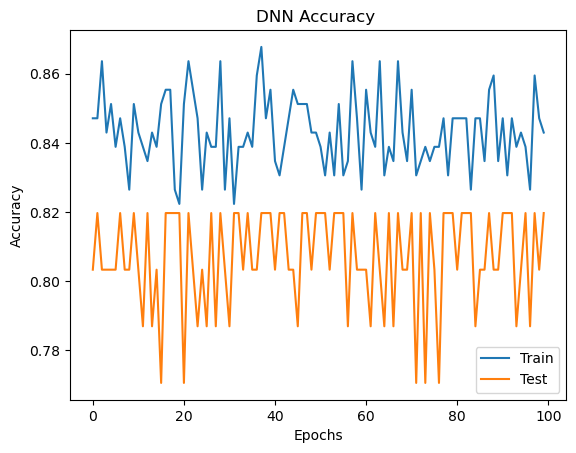

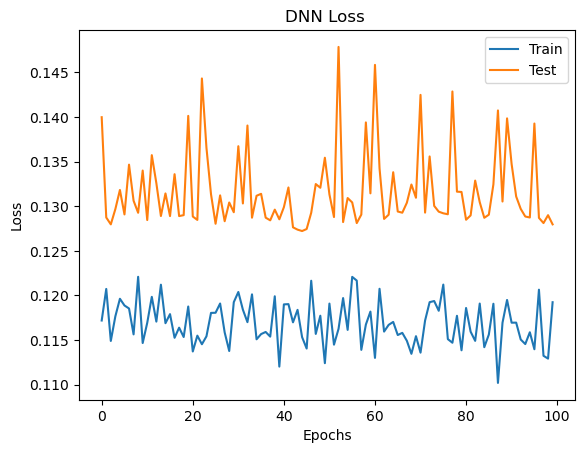

In [32]:
import matplotlib.pyplot as plt
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])
plt.title("DNN Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title("DNN Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

Epoch 1/10
8/8 [==============================] - 1s 33ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5413 - val_accuracy: 0.4590
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5412 - val_accuracy: 0.4590
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5412 - val_accuracy: 0.4590
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5411 - val_accuracy: 0.4590
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5411 - val_accuracy: 0.4590
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5411 - val_accuracy: 0.4590
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5000 - accuracy: 0.4545 - val_loss: 0.5411 - val_accuracy: 0.4590
Epoch 8/10
8/8 [=============

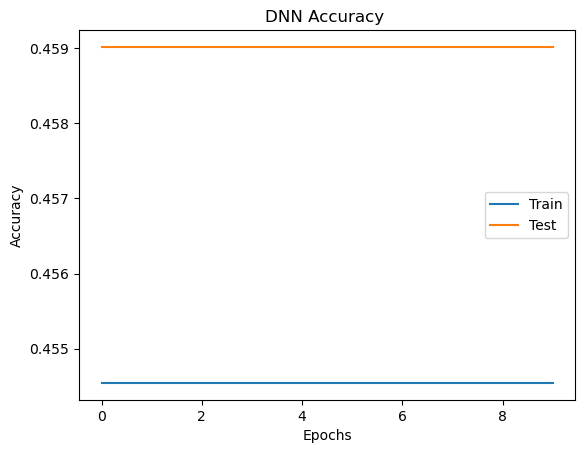

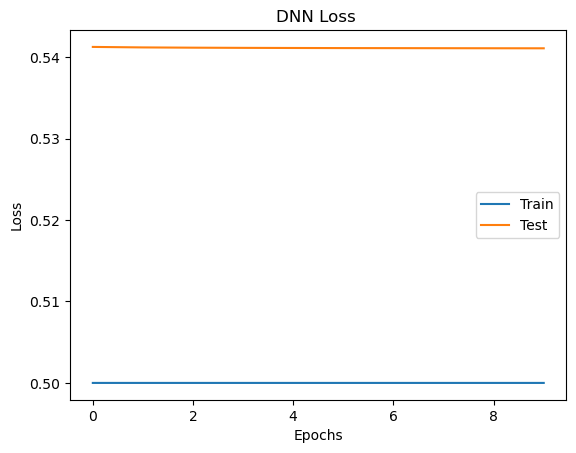

In [37]:
INPUT_SIZE = X.shape[1]

model2 = models.Sequential([
    layers.Dense(16,activation='relu',input_dim=13),
    layers.Dense(1,activation = 'sigmoid' )]
)


In [ ]:
INPUT_SIZE = X.shape[1]

model2 = models.Sequential([
    layers.Dense(16,activation='relu',input_dim=13),
    layers.Dense(1,activation = 'sigmoid' )]
)

In [ ]:
INPUT_SIZE = X.shape[1]

model2 = models.Sequential([
    layers.Dense(16,activation='relu',input_dim=13),
    layers.Dense(1,activation = 'sigmoid' )]
)

In [ ]:
INPUT_SIZE = X.shape[1]

model2 = models.Sequential([
    layers.Dense(16,activation='relu',input_dim=13),
    layers.Dense(1,activation = 'sigmoid' )]
)